<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : Exe26 - Clusters of Grain

#### Name: Ooi Caaron

#### IC Number:990701-07-5837

#### Date :1/8/23

#### Introduction : Learning clusters of grain



#### Conclusion :






# How many clusters of grain?

This exercise is taken and modified from https://github.com/benjaminwilson/python-clustering-exercises

This is a class to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).


**Step 1:** Load the dataset _(written for you)_.

In [1]:
import pandas as pd

seeds_df = pd.read_csv('seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [3]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [4]:
measurements_array = seeds_df.values

measurements_array

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

inertias = []

for k in range(1, 11): 
    model = KMeans(n_clusters=k)

    model.fit(seeds_df.values)

    inertias.append(model.inertia_)

print(inertias)


C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

[2719.852410177952, 1011.7123453151191, 587.3186115940429, 471.0271456822109, 386.0421139658138, 323.27027205797947, 277.56117926703195, 240.5667293168427, 220.39950681378002, 202.48459939311235]


C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

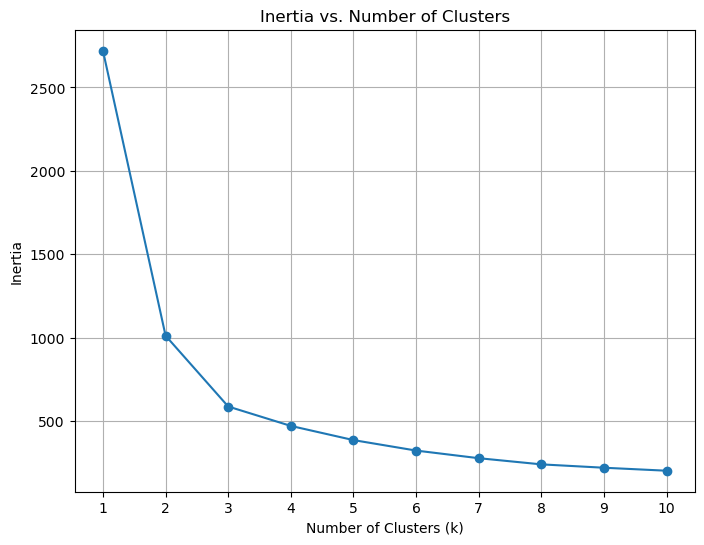

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**Excellent work!** You can see from the graph the "best" number of clusters. Use this value for the next steps.

**Step 6:** Create a `KMeans` model called `model` with the best value from the above steps.

In [7]:
best_k = 3  # You need to set this to the value of k that you find best from the plot

# Create the KMeans model with the best value of k
model = KMeans(n_clusters=best_k)

# Fit the model to the grain data samples
model.fit(seeds_df.values)

C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

**Step 7:** Use the .fit_predict() method of model to fit it to samples and derive the cluster labels.

Calling .fit_predict() is the same as calling .fit() and then calling .predict().

In [8]:
cluster_labels = model.fit_predict(seeds_df.values)

# Print the cluster labels for each sample (grain)
print(cluster_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 0 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\envs\python-dscourse\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Step 8:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values.

In [10]:
df = pd.DataFrame({'labels': cluster_labels, 'varieties': seeds_df.index})

df

,labels,varieties
0,2,0
1,2,1
2,2,2
3,2,3
4,2,4
...,...,...
205,1,205
206,1,206
207,1,207
208,1,208


**Step 9:** Use the `pd.crosstab()` function on `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label. Assign the result to `ct`.

In [12]:
ct = pd.crosstab(df['labels'], df['varieties'])


**Step 10:** Display `ct` by evaluating it - and inspect your cross-tabulation!  You'll see that your clustering is pretty good.

In [13]:
ct

varieties,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0


Now you are done. If you wish, you can also try to plot the clusters to visualize it.
